<a href="https://colab.research.google.com/github/sidkatiyar09/Data-Analytics/blob/main/Group_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages
!pip install pmdarima --quiet
!pip install tensorflow --quiet

In [ ]:
# !pip uninstall -y numpy pmdarima tensorflow
!pip install numpy
!pip install pandas

# STEP 1: Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


# STEP 2: Load Google Trends data (downloaded manually)
https://trends.google.com/trends/explore?date=today%205-y&q=vacation&hl=en-IN

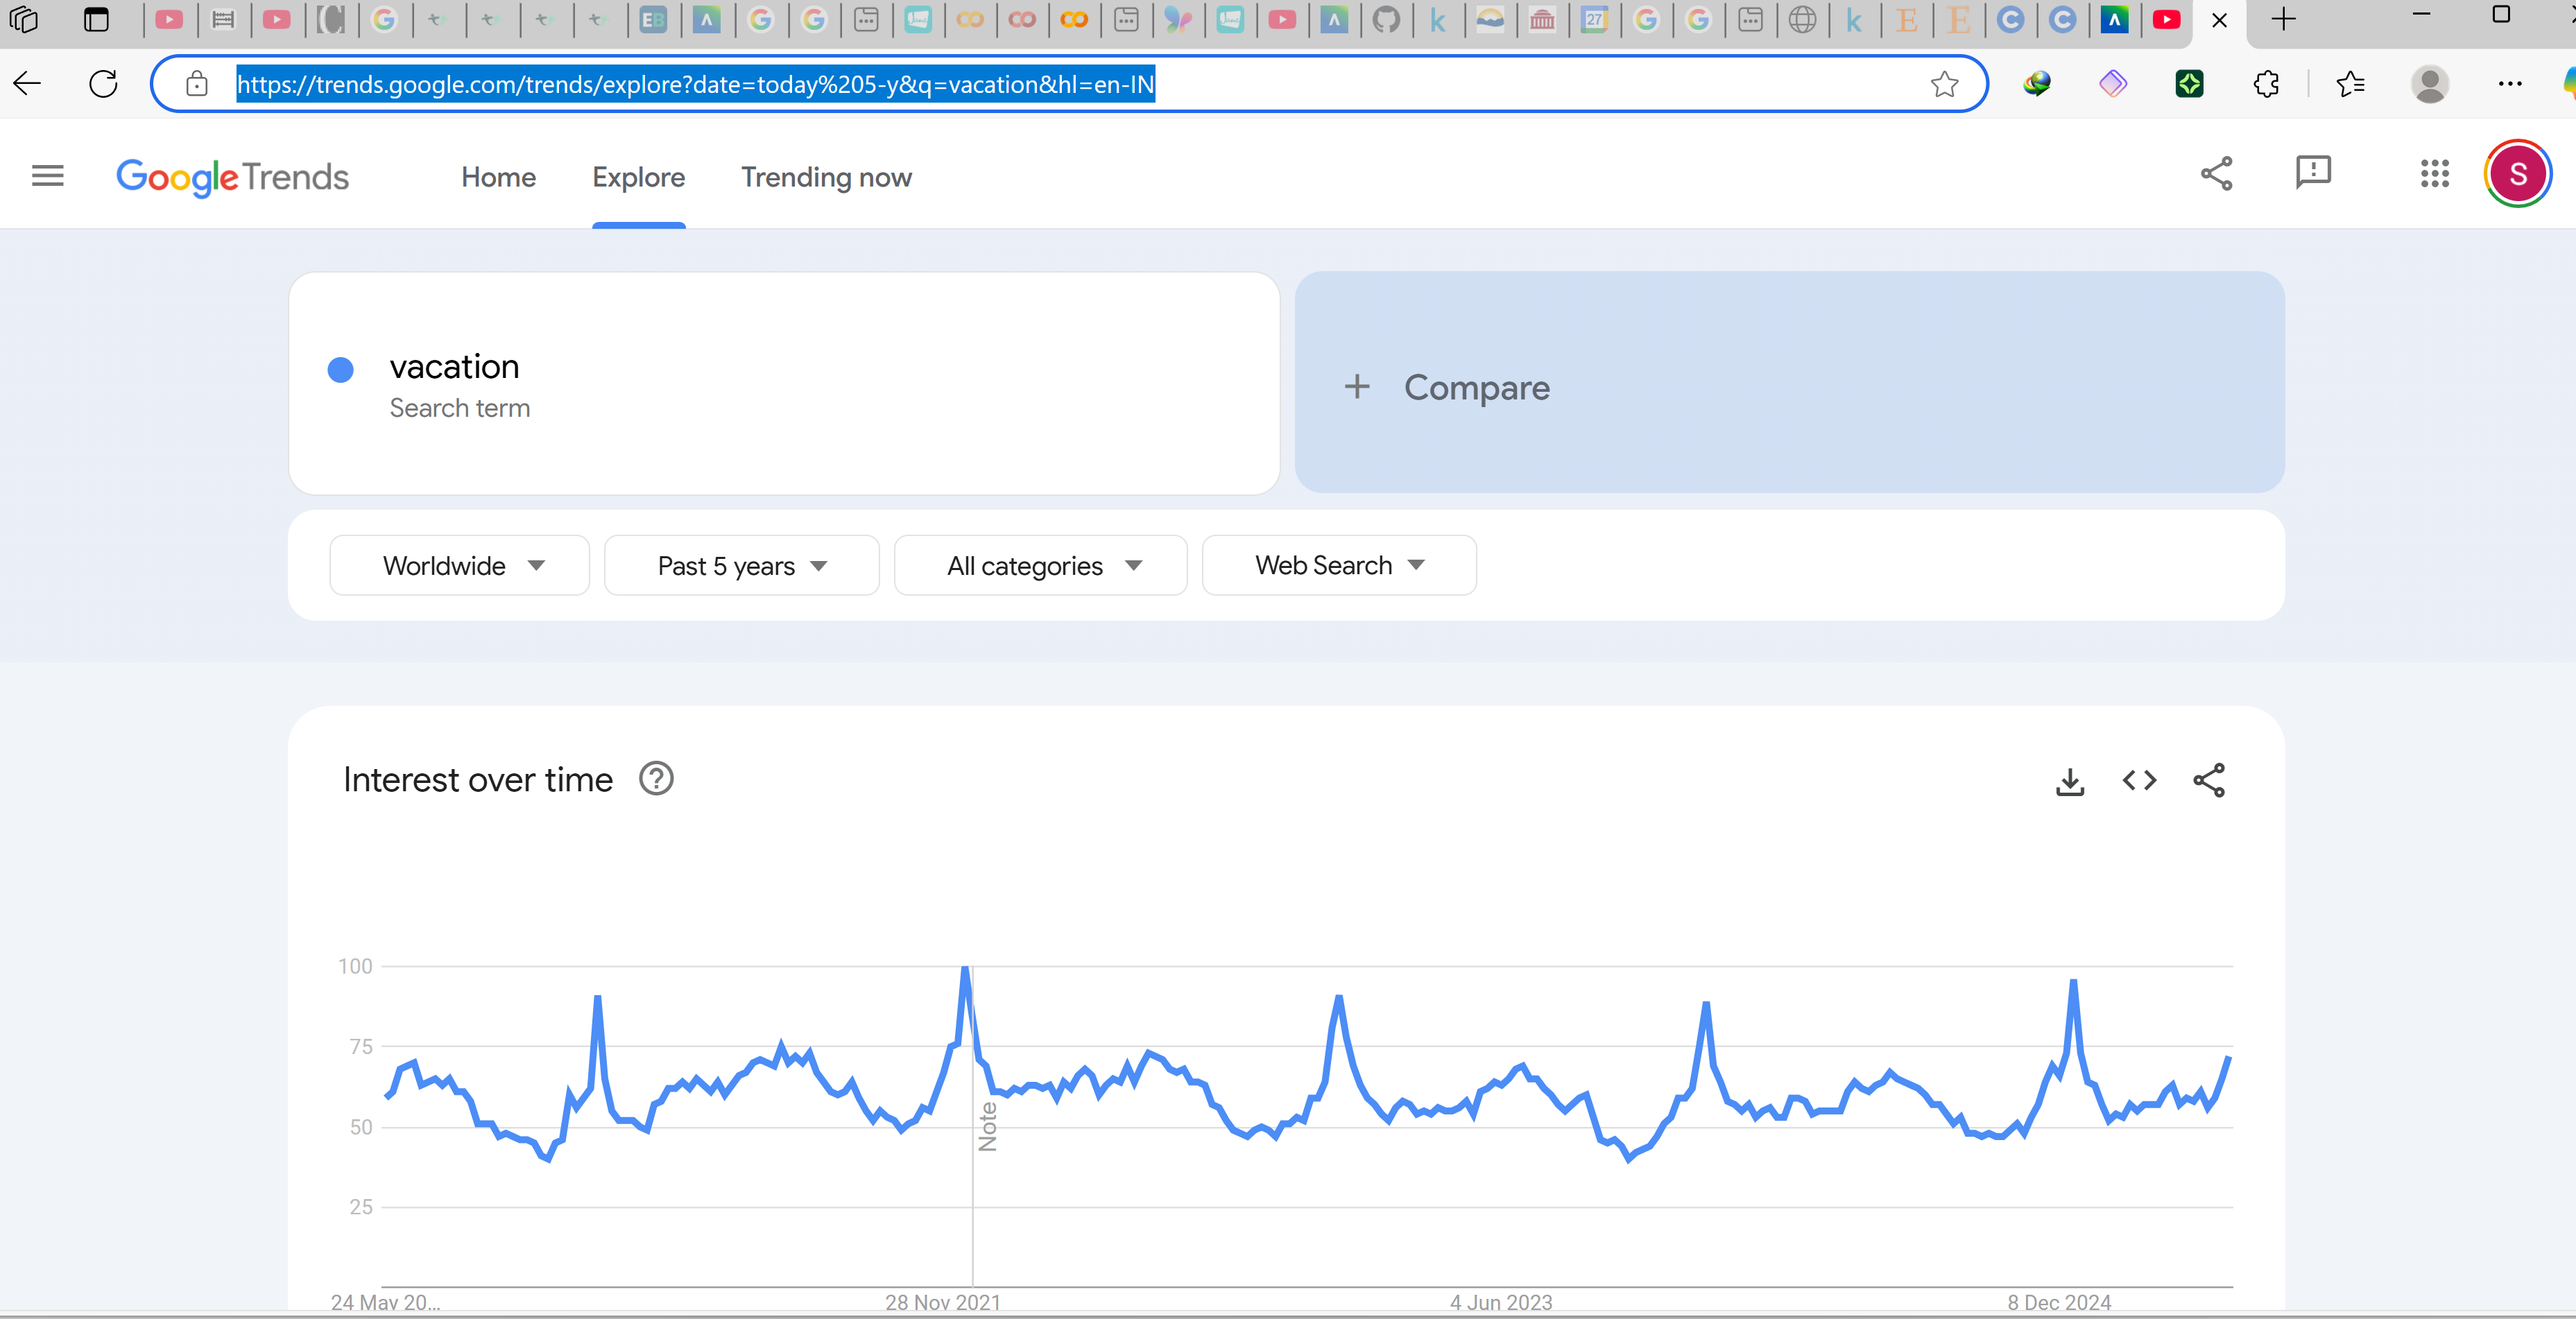


# Rename columns and convert date

In [ ]:
df_world = pd.read_csv('/content/world multiTimeline (1).csv', skiprows=1)
df_us = pd.read_csv('/content/usa multiTimeline.csv', skiprows=1)

df_world.columns = ['Date', 'Vacation']
df_us.columns = ['Date', 'Vacation']
df_world['Date'] = pd.to_datetime(df_world['Date'])
df_us['Date'] = pd.to_datetime(df_us['Date'])
df_world.set_index('Date', inplace=True)
df_us.set_index('Date', inplace=True)

# Ploting graph for raw data

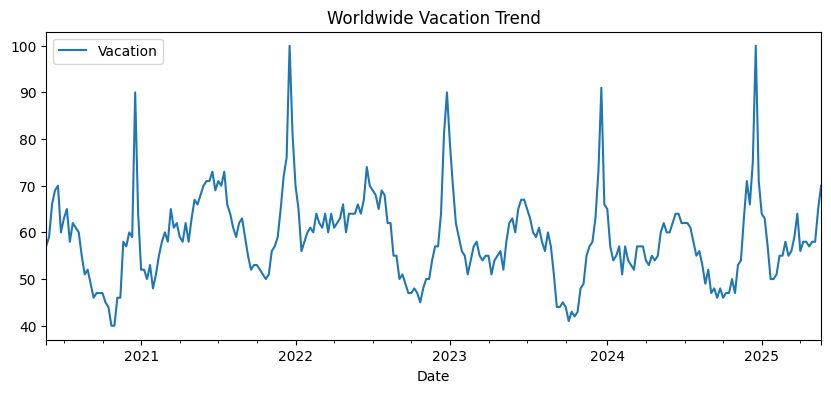

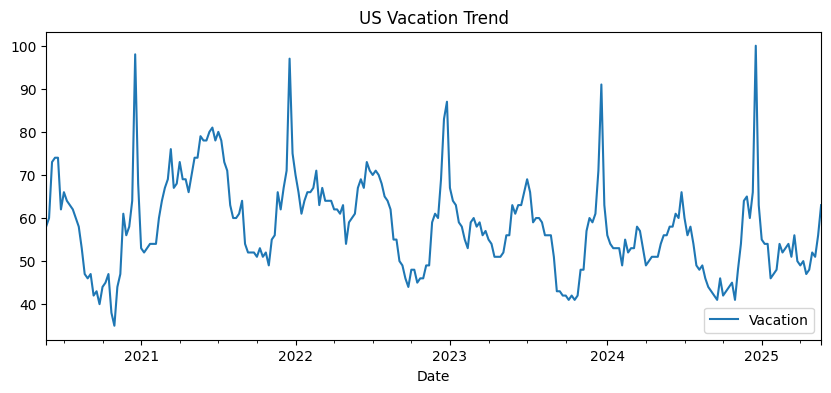

In [ ]:
df_world.plot(title="Worldwide Vacation Trend", figsize=(10, 4))
plt.show()
df_us.plot(title="US Vacation Trend", figsize=(10, 4))
plt.show()



# STEP 3:
# ARIMA

In [ ]:
model_world = ARIMA(df_world['Vacation'], order=(2,1,2))
result_world = model_world.fit()
forecast_world = result_world.forecast(steps=12)

model_us = ARIMA(df_us['Vacation'], order=(2,1,2))
result_us = model_us.fit()
forecast_us = result_us.forecast(steps=12)

# Display forecasts
print("ARIMA Forecast (Worldwide):", forecast_world)
print("ARIMA Forecast (US):", forecast_us)



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  

ARIMA Forecast (Worldwide): 2025-06-01    68.222607
2025-06-08    67.432374
2025-06-15    68.993989
2025-06-22    70.180911
2025-06-29    68.935738
2025-07-06    67.436358
2025-07-13    68.286810
2025-07-20    69.994842
2025-07-27    69.590116
2025-08-03    67.789657
2025-08-10    67.727933
2025-08-17    69.500062
Freq: W-SUN, Name: predicted_mean, dtype: float64
ARIMA Forecast (US): 2025-06-01    62.287880
2025-06-08    62.085712
2025-06-15    62.465423
2025-06-22    62.917614
2025-06-29    62.986493
2025-07-06    62.698502
2025-07-13    62.419461
2025-07-20    62.417586
2025-07-27    62.627311
2025-08-03    62.793973
2025-08-10    62.766544
2025-08-17    62.618789
Freq: W-SUN, Name: predicted_mean, dtype: float64


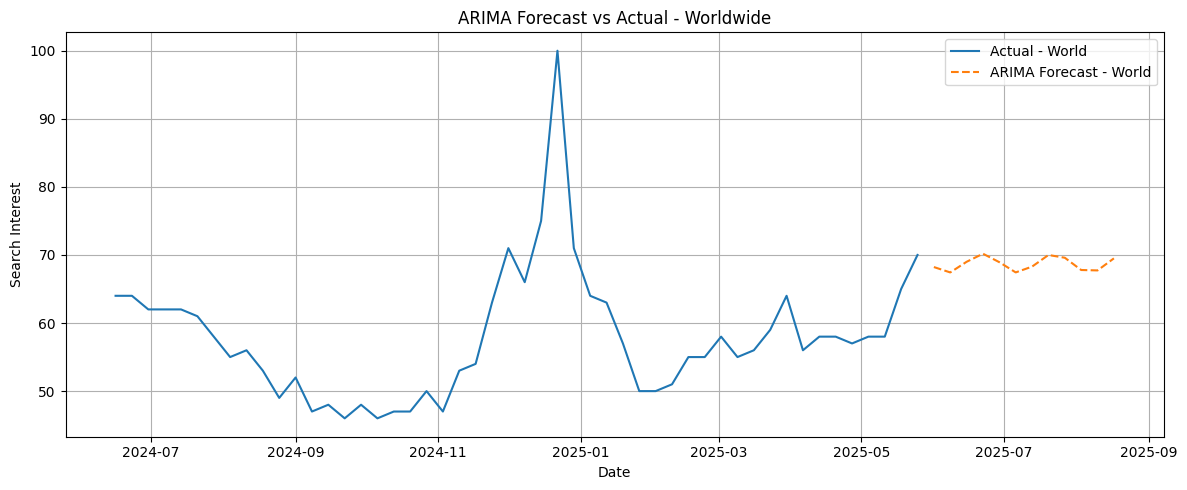

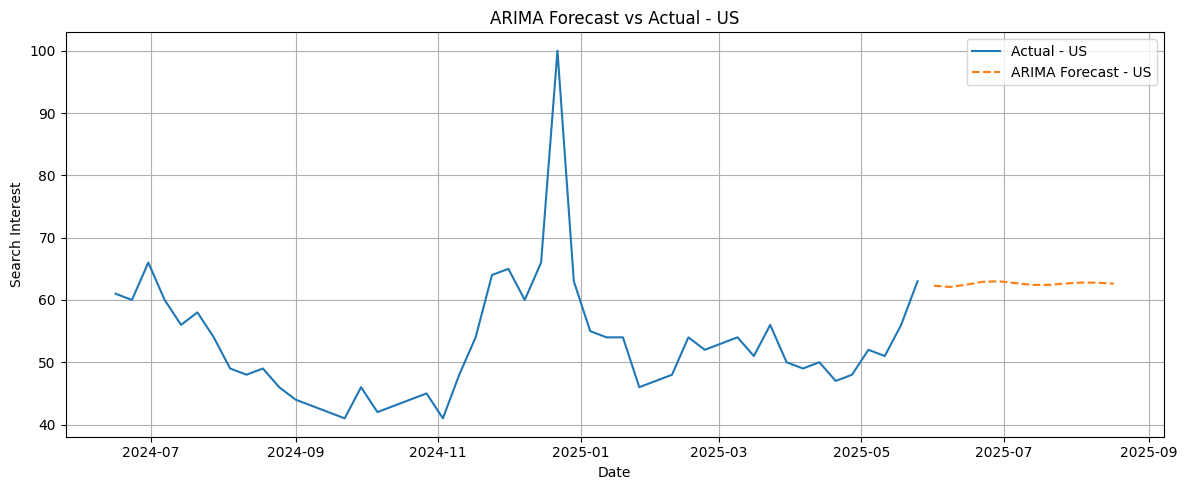

In [ ]:

#ARIMA FORECASTS
forecast_index_world = pd.date_range(start=df_world.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')
forecast_index_us = pd.date_range(start=df_us.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')

forecast_series_world = pd.Series(forecast_world.values, index=forecast_index_world)
forecast_series_us = pd.Series(forecast_us.values, index=forecast_index_us)

plt.figure(figsize=(12, 5))
plt.plot(df_world.index[-50:], df_world['Vacation'][-50:], label='Actual - World')
plt.plot(forecast_series_world.index, forecast_series_world, label='ARIMA Forecast - World', linestyle='--')
plt.title("ARIMA Forecast vs Actual - Worldwide")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df_us.index[-50:], df_us['Vacation'][-50:], label='Actual - US')
plt.plot(forecast_series_us.index, forecast_series_us, label='ARIMA Forecast - US', linestyle='--')
plt.title("ARIMA Forecast vs Actual - US")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 4:
#LSTM

In [ ]:
scaler = MinMaxScaler()
scaled_world = scaler.fit_transform(df_world[['Vacation']])
scaled_us = scaler.fit_transform(df_us[['Vacation']])

# LSTM windows of 30 days (last 30 days)
X_world = np.array([scaled_world[i-30:i, 0] for i in range(30, len(scaled_world))])
y_world = scaled_world[30:]

X_us = np.array([scaled_us[i-30:i, 0] for i in range(30, len(scaled_us))])
y_us = scaled_us[30:]

X_world = X_world.reshape(X_world.shape[0], X_world.shape[1], 1)
X_us = X_us.reshape(X_us.shape[0], X_us.shape[1], 1)



# LSTM Model - World vacation data

In [ ]:
model_world_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(30, 1)),
    Dense(1)
])
model_world_lstm.compile(optimizer='adam', loss='mse')
model_world_lstm.fit(X_world, y_world, epochs=20, verbose=0)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# LSTM Model - for US vacation data

In [ ]:
model_us_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(30, 1)),
    Dense(1)
])
model_us_lstm.compile(optimizer='adam', loss='mse')
model_us_lstm.fit(X_us, y_us, epochs=20, verbose=0)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Predicting next point in time

In [ ]:

pred_world = model_world_lstm.predict(scaled_world[-30:].reshape(1, 30, 1))
pred_us = model_us_lstm.predict(scaled_us[-30:].reshape(1, 30, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


# Inverse scale

In [ ]:
inv_pred_world = scaler.inverse_transform(pred_world.reshape(-1, 1))
inv_pred_us = scaler.inverse_transform(pred_us.reshape(-1, 1))

print("LSTM Forecast (Next World Value):", inv_pred_world.flatten()[0])
print("LSTM Forecast (Next US Value):", inv_pred_us.flatten()[0])


LSTM Forecast (Next World Value): 59.377632
LSTM Forecast (Next US Value): 56.27469
